# PROYECTO1-ETAPA1

**INTEGRANTES**
- Juan Sebastian Sanchez Delgado - 202013577
- Miguel Angel Cardenas - 202010998
- Santiago Paeres Gonzalez - 201425176

## 1. Entendimiento y preparacion de los datos


In [4]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Descargando stopwords
nltk.download("punkt")
nltk.download("stopwords")
stop_words = stopwords.words("spanish")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/santiagopaeres/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/santiagopaeres/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df_ods = pd.read_csv("./cat_345.csv", sep=';', encoding = 'utf8')

In [8]:
df_ods.shape

(3000, 2)

In [9]:
df_ods.dtypes

Textos_espanol    object
sdg                int64
dtype: object

In [10]:
df_ods.sample(5)

,Textos_espanol,sdg
160,El enfoque en este marco es que la base de med...,3
2612,Algunas de estas últimas organizaciones atiend...,5
2900,"A continuación, discutimos brevemente algunas ...",5
826,Todas las funciones necesarias en torno a la s...,3
2201,"Por lo general, estos programas pretenden desa...",5


### 1.1 Completitud

In [11]:
# Se muestra la proporcion de registros con valores nulos con respecto a la totalidad de registros
df_ods.isnull().sum() / df_ods.shape[0]

Textos_espanol    0.0
sdg               0.0
dtype: float64

In [12]:
# Cálculo de porcentaje de valores nulos por columna
((df_ods.isnull().sum()/df_ods.shape[0])).sort_values(ascending=False)

Textos_espanol    0.0
sdg               0.0
dtype: float64

### 1.2 Unicidad

In [13]:
# Se revisa el numero de filas duplicadas
df_ods.duplicated(keep = False).sum()

0

### 1.3 Consistencia

In [14]:
df_ods["Textos_espanol"] = df_ods["Textos_espanol"].astype(str)

### 1.4 Validez

In [15]:
df_ods['sdg'].value_counts()

sdg
3    1000
4    1000
5    1000
Name: count, dtype: int64

In [16]:
df_ods['Textos_espanol'].value_counts()

Textos_espanol
Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.                                         

In [17]:
df_ods.sample(20)

,Textos_espanol,sdg
2332,"Sin embargo, dÃ©cadas despuÃ©s de la caÃda de ...",5
2657,La brecha de género en las actividades empresa...,5
2228,"En todos los países, las fuerzas armadas estat...",5
1223,La competencia en el uso de las TIC en el aula...,4
2941,Para un análisis completo y profundo de las de...,5
697,Un sistema de atención primaria funcional en e...,3
86,Los ahorros solo fueron estadísticamente signi...,3
1257,Los resultados de particular interés se relaci...,4
2887,Estudios recientes de empresas emergentes de a...,5
500,Los costes de la esquizofrenia fueron de aprox...,3


In [18]:
df_ods[df_ods['Textos_espanol'].str.contains('Ã')]

,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas ...",3
10,Dos encuestados seÃ±alaron que no existe un or...,3
26,"También promueve mejoras en la prevención, el ...",3
30,La falta de programas completos de acreditació...,3
46,Dado el aumento de enfermedades crónicas como ...,3
...,...,...
2984,Las actividades empresariales siguen viéndose ...,5
2990,La Agenda Nacional de Jordania 2006-15 estable...,5
2991,"En la mayoría de los países de la CAO, los fun...",5
2996,"Por el contrario, el porcentaje de hogares en ...",5


In [19]:
# Remplaza lo caracteres erroneos con su equivalencia pero en UTF-8
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ã¡', 'á')
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ã©', 'é')
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ã³', 'ó')
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ãº', 'ú')
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ã±', 'ñ')
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ã', 'í')

In [20]:
df_ods[df_ods['Textos_espanol'].str.contains('Ã')]

,Textos_espanol,sdg


In [21]:
df_ods.sample(10)

,Textos_espanol,sdg
578,"Estos pueden basarse en la edad, el sexo o el ...",3
2002,La Convención abarca el derecho de la mujer a ...,5
2005,También es importante la sensibilización y edu...,5
2859,Obliga a los partidos políticos a garantizar l...,5
2666,Esto requiere crear espacios seguros y confian...,5
1594,Los Resultados de Prosperidad incluyen medidas...,4
2155,"El informe del Secretario General, A/64/93, pr...",5
1931,"Además, la reciente estrategia Educar para una...",4
911,"En muchos aspectos, la ""calidad"" está en el co...",3
1291,Las recompensas se distribuyen entre los maest...,4


### 1.5 Transformacion

In [22]:
# Se dividen los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_ods["Textos_espanol"], df_ods["sdg"], test_size=0.3, stratify=df_ods["sdg"], random_state=1)

In [23]:
X_train.shape, X_test.shape

((2100,), (900,))

In [24]:
pd.Series(y_train).value_counts(normalize=True)

sdg
4    0.333333
3    0.333333
5    0.333333
Name: proportion, dtype: float64

In [25]:
pd.Series(y_test).value_counts(normalize=True)

sdg
3    0.333333
4    0.333333
5    0.333333
Name: proportion, dtype: float64

In [26]:
bow = CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [27]:
X_bow = bow.fit_transform(X_train)

In [28]:
print("Vocabulary size:", len(bow.vocabulary_))

Vocabulary size: 15134


In [29]:
tfidf = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [30]:
X_tfidf = tfidf.fit_transform(X_train)

In [31]:
print("Vocabulary size:", len(tfidf.vocabulary_))

Vocabulary size: 15134


## 2. Modelado y evaluacion

### 2.1 Entrenando Modelo con BoW y Random Forest classifier (Juan Sebastian Sanchez Delgado)

In [32]:
bow_model = RandomForestClassifier(random_state=2)

In [33]:
bow_model.fit(X_bow, y_train)

RandomForestClassifier(random_state=2)

<Axes: >

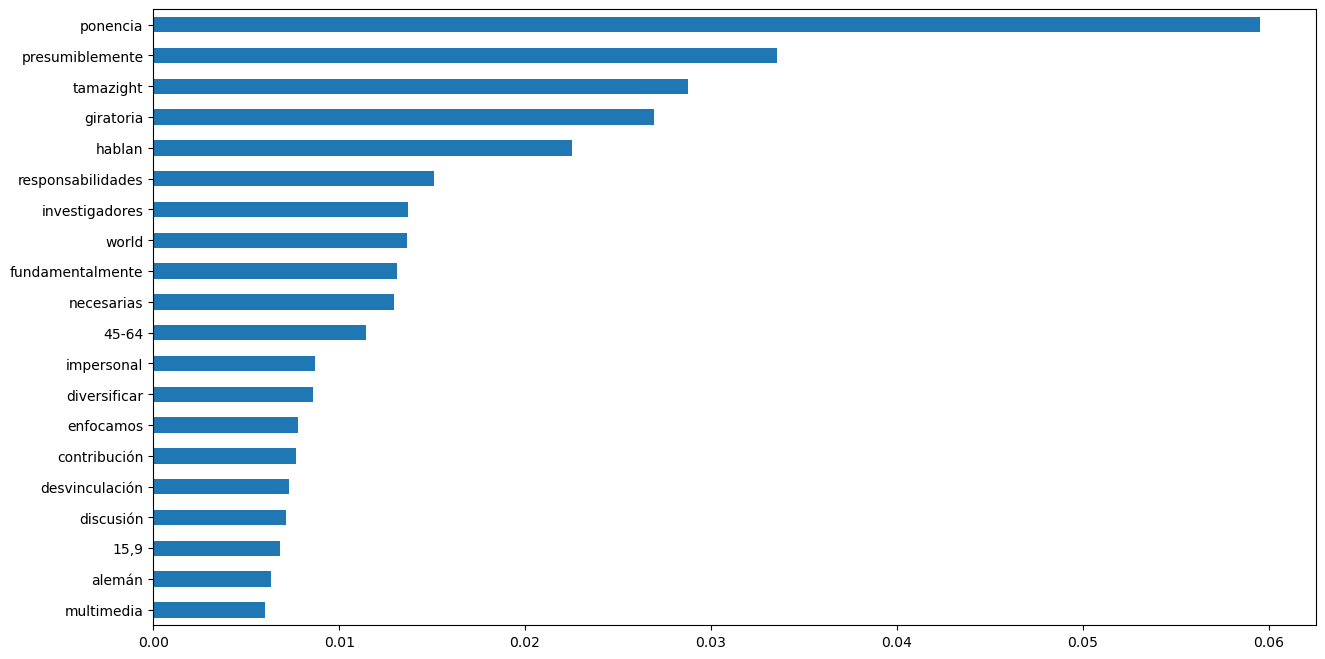

In [34]:
# Se muestra la importancia de algunas palabras para determinar que tan relevante es para tomar una decision para el modelo
pd.Series(bow_model.feature_importances_, index=bow.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 8))

In [35]:
bow_estimators = bow_model.estimators_
print("Numero de arboles de decision:", len(bow_estimators))
print("Profundidad de los arboles (mean):", np.mean([tree.get_depth() for tree in bow_estimators]))

Numero de arboles de decision: 100
Profundidad de los arboles (mean): 97.14


In [36]:
y_train_bow_predict = bow_model.predict(X_bow)
y_test_bow_predict = bow_model.predict(bow.transform(X_test))

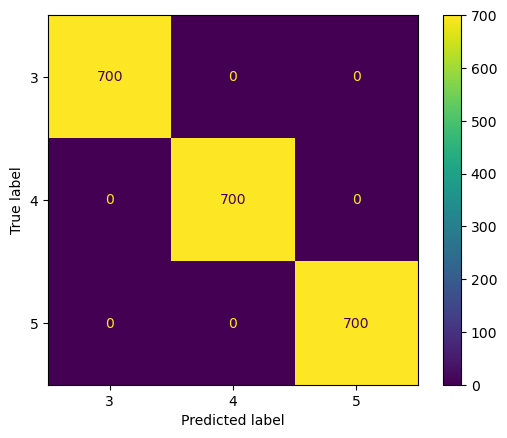

In [37]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

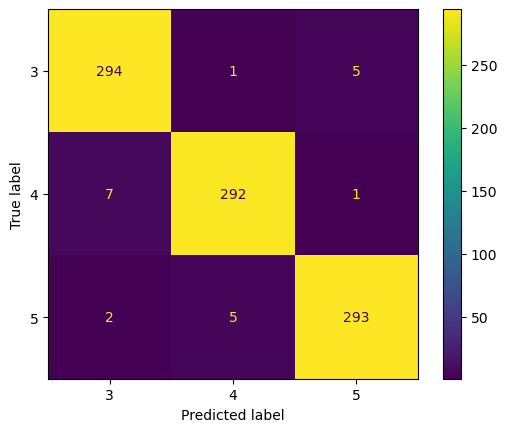

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [39]:
print("Precision:", precision_score(y_train, y_train_bow_predict, average='micro'))
print("Recall:", recall_score(y_train, y_train_bow_predict, average='micro'))
print("F1:", f1_score(y_train, y_train_bow_predict, average='micro'))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [40]:
print("Precision:", precision_score(y_test, y_test_bow_predict, average='micro' ))
print("Recall:", recall_score(y_test, y_test_bow_predict, average='micro'))
print("F1:", f1_score(y_test, y_test_bow_predict, average='micro'))

Precision: 0.9766666666666667
Recall: 0.9766666666666667
F1: 0.9766666666666667


### 2.2 Entrenando modelo con TF-IDF (Santiago Paeres Gonzalez)

In [41]:
tfidf_model = RandomForestClassifier(random_state=2)

In [42]:
tfidf_model.fit(X_tfidf, y_train)

RandomForestClassifier(random_state=2)

<Axes: >

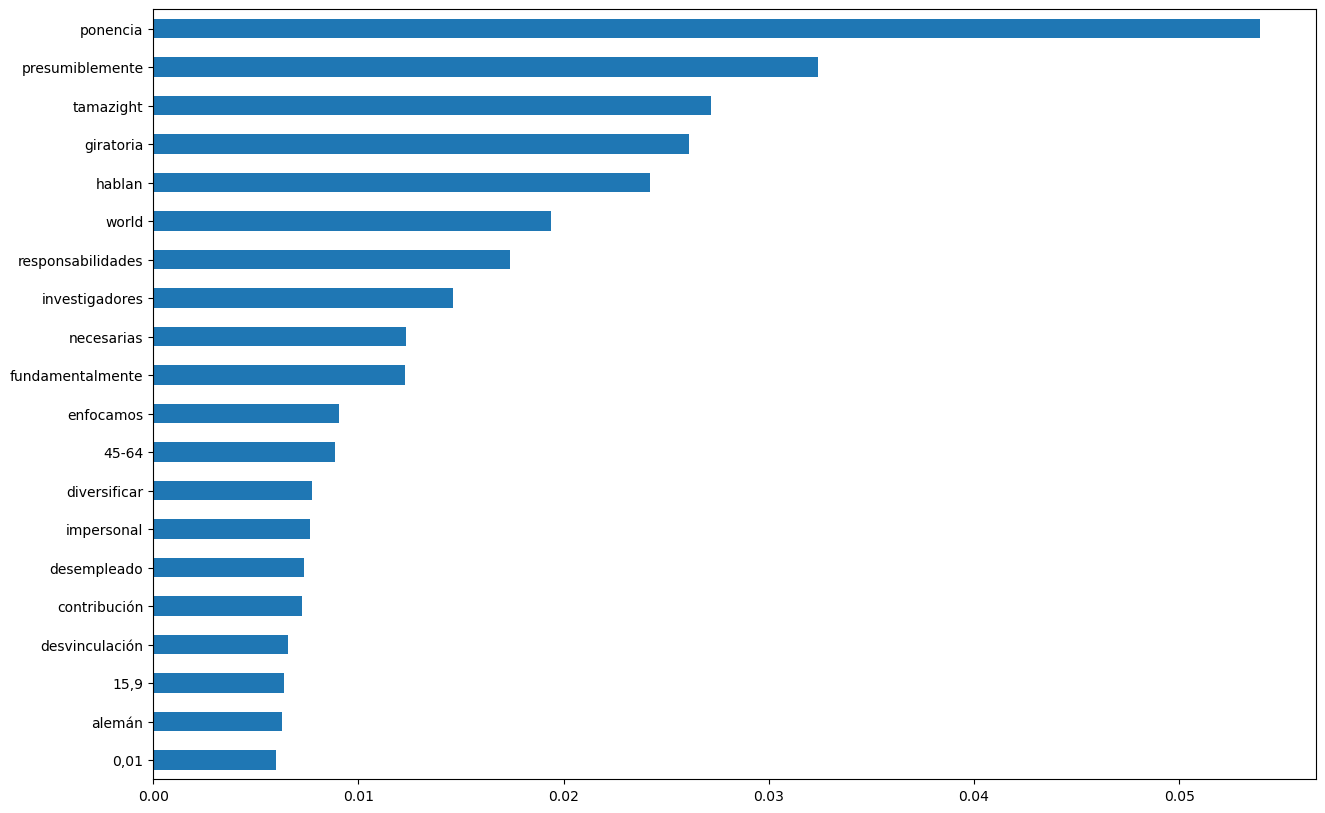

In [43]:
pd.Series(tfidf_model.feature_importances_, index=tfidf.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

In [44]:
tfidf_estimators = tfidf_model.estimators_
print("Number of trees:", len(tfidf_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in tfidf_estimators]))

Number of trees: 100
Trees depth (mean): 94.37


In [45]:
y_train_tfidf_predict = tfidf_model.predict(X_tfidf)
y_test_tfidf_predict = tfidf_model.predict(tfidf.transform(X_test))

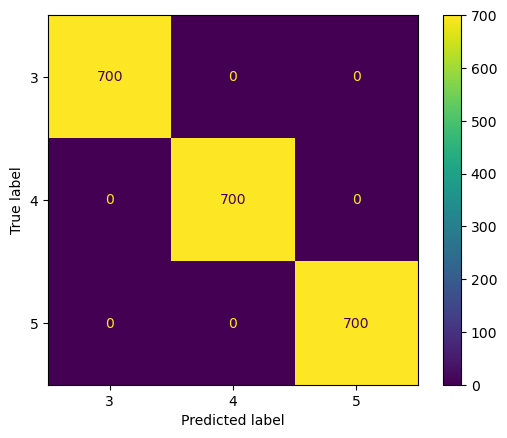

In [46]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

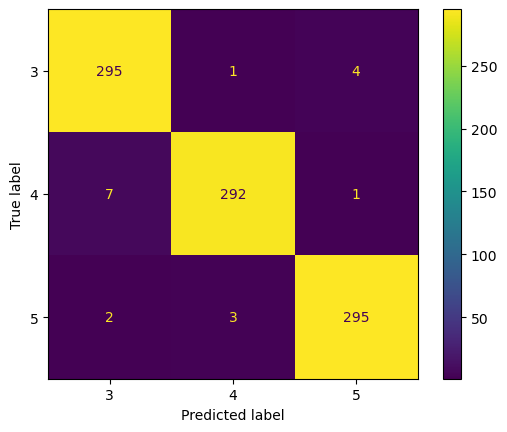

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [72]:
print("Precision:", precision_score(y_train, y_train_tfidf_predict, average='micro'))
print("Recall:", recall_score(y_train, y_train_tfidf_predict, average='micro'))
print("F1:", f1_score(y_train, y_train_tfidf_predict, average='micro'))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [73]:
print("Precision:", precision_score(y_test, y_test_tfidf_predict, average='micro'))
print("Recall:", recall_score(y_test, y_test_tfidf_predict, average='micro'))
print("F1:", f1_score(y_test, y_test_tfidf_predict, average='micro'))

Precision: 0.98
Recall: 0.98
F1: 0.98


### Seleccionando un posible mejor modelo

In [74]:
pipeline = Pipeline(steps = [
    ("vectorizer", CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)),
    ("classifier", RandomForestClassifier(random_state=4))
])

In [75]:
param_grid = {
    "vectorizer": [TfidfVectorizer(max_df=0.5,tokenizer=word_tokenize, stop_words=stop_words)],
    "vectorizer__lowercase": [True, False],
    "classifier__n_estimators": [30, 50],
    "classifier__max_depth": [25, 50]
}

In [76]:
search = RandomizedSearchCV(pipeline, param_grid, n_iter=15, scoring=["precision", "recall", "f1"], refit="f1", cv=30, return_train_score=True, verbose=1, random_state=5)

In [77]:
search.fit(X_train, y_train)

Fitting 30 folds for each of 8 candidates, totalling 240 fits


RandomizedSearchCV(cv=30,
                   estimator=Pipeline(steps=[('vectorizer',
                                              CountVectorizer(stop_words=['de',
                                                                          'la',
                                                                          'que',
                                                                          'el',
                                                                          'en',
                                                                          'y',
                                                                          'a',
                                                                          'los',
                                                                          'del',
                                                                          'se',
                                                                          'las',
                                

In [78]:
search.best_params_

{'vectorizer__lowercase': True,
 'vectorizer': TfidfVectorizer(max_df=0.5,
                 stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                             'del', 'se', 'las', 'por', 'un', 'para', 'con',
                             'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                             'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                             'porque', ...],
                 tokenizer=<function word_tokenize at 0x7fc348d26700>),
 'classifier__n_estimators': 30,
 'classifier__max_depth': 25}

In [81]:
search.best_estimator_

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.5,
                                 stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...],
                                 tokenizer=<function word_tokenize at 0x7fc348d26700>)),
                ('classifier',
                 RandomForestClassifier(max_depth=25, n_estimators=30,
                                        random_state=4))])

In [82]:
y_train_search_predict = search.best_estimator_.predict(X_train)
y_test_search_predict = search.best_estimator_.predict(X_test)

In [83]:
print("Precision:", precision_score(y_train, y_train_search_predict, average='micro'))
print("Recall:", recall_score(y_train, y_train_search_predict, average='micro'))
print("F1:", f1_score(y_train, y_train_search_predict, average='micro'))

Precision: 0.9966666666666667
Recall: 0.9966666666666667
F1: 0.9966666666666667


In [84]:
print("Precision:", precision_score(y_test, y_test_search_predict, average='micro'))
print("Recall:", recall_score(y_test, y_test_search_predict, average='micro'))
print("F1:", f1_score(y_test, y_test_search_predict, average='micro'))

Precision: 0.9533333333333334
Recall: 0.9533333333333334
F1: 0.9533333333333334


### 2.3 Entrenando modelo con Gradient Boosting (Miguel Angel Cardenas) 

In [85]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [86]:
gb_classifier.fit(X_bow, y_train)

GradientBoostingClassifier(random_state=42)

<Axes: >

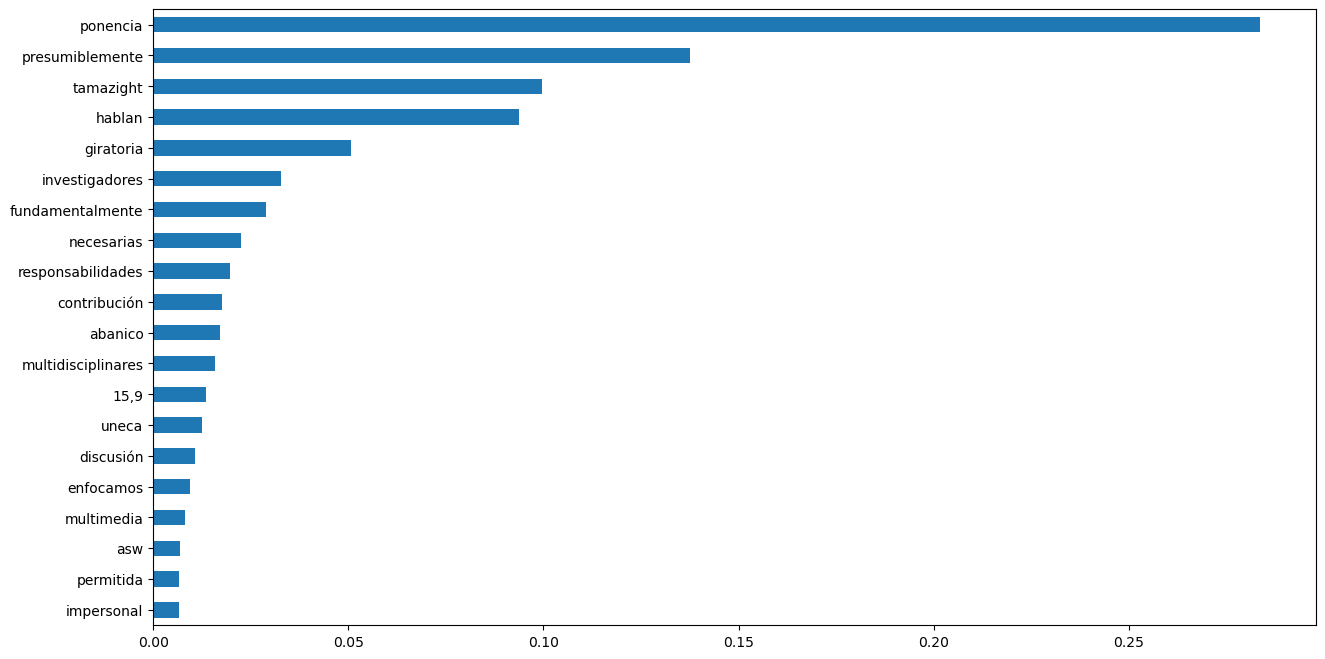

In [87]:
pd.Series(gb_classifier.feature_importances_, index=bow.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 8))

In [88]:
gb_estimators = gb_classifier.estimators_

# Imprime el número de árboles
print("Número de árboles de decisión:", len(gb_estimators))

# Calcula la profundidad promedio de los árboles
depths = [tree[0].tree_.max_depth for tree in gb_estimators]
print("Profundidad de los árboles (media):", np.mean(depths))

Número de árboles de decisión: 100
Profundidad de los árboles (media): 3.0


In [89]:
y_train_gb_predict = gb_classifier.predict(X_bow)

# Realiza predicciones en el conjunto de prueba
y_test_gb_predict = gb_classifier.predict(bow.transform(X_test))

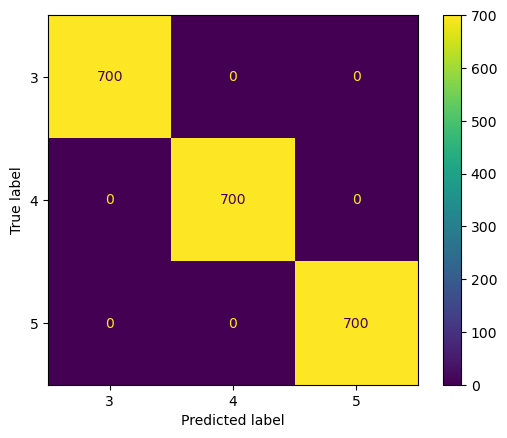

In [90]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_gb_predict)

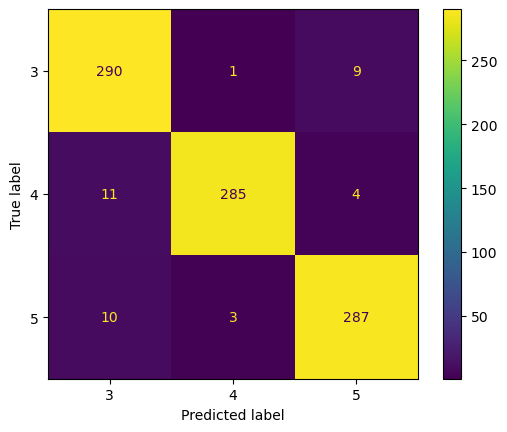

In [91]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_gb_predict)

In [92]:
print("Precision:", precision_score(y_train, y_train_gb_predict, average='micro'))
print("Recall:", recall_score(y_train, y_train_gb_predict, average='micro'))
print("F1:", f1_score(y_train, y_train_gb_predict, average='micro'))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [93]:
print("Precision:", precision_score(y_test, y_test_gb_predict, average='micro' ))
print("Recall:", recall_score(y_test, y_test_gb_predict, average='micro'))
print("F1:", f1_score(y_test, y_test_gb_predict, average='micro'))

Precision: 0.9577777777777777
Recall: 0.9577777777777777
F1: 0.9577777777777777


## 3. Resultados

### 3.1 Escogiendo el Modelo mas adecuado

Aunque en un escenario ideal se podría encontrar el modelo de clasificación óptimo probando diferentes combinaciones de hiperparámetros, tanto como para los vectorizadores como para el Random Forest, para los tres algoritmos propuestos (Bag of Words, TF-IDF y Gradient Boosting), fue evidente en el intento en la seccion de `Seleccionando un posible mejor modelo` de que esta tarea es sumamente tediosa y conlleva un gasto computacional significativo por la forma en la que los algoritmos como RandomizedSearchCV o la optimización Bayesiana funcionan. Además, existen muchísimas posibles combinaciones de hiperparametros por lo que no es tan facil encontrar el óptimo.  

Sin embargo, con los hiperparámetros escogidos en el pipeline y utilizando RandomizedSearchCV NO se llegó a un mejor resultado que el utilizado originalmente, pues sin hacer uso de RandomizedSearchCV la puntuación F1 del modelo de TF-IDF fue de 0.98, mientras que con RandomizedSearchCV fue de 0.95 para los datos de prueba. Claramente, se pudieron haber escogido mejores hiperparámetros para probar, pero esto va más alla del alcance de este proyecto, además se llegó a valores aceptables de precision, recuperación (recall) y puntuación F1.

Asi pues, comparando los tres modelos escogidos en sus metricas de precision, recall (recuperación) y puntuación F1:

In [101]:
# Crear un diccionario con los nombres de los modelos y sus valores de F1
data = {
    'Modelo': ['BoW', 'TF-IDF', 'Gradient Boosting'],
    'Precisión': [ precision_score(y_test, y_test_bow_predict, average='micro' ), precision_score(y_test, y_test_tfidf_predict, average='micro'), precision_score(y_test, y_test_gb_predict, average='micro' )],
    'Recall': [recall_score(y_test, y_test_bow_predict, average='micro'), recall_score(y_test, y_test_tfidf_predict, average='micro'), recall_score(y_test, y_test_gb_predict, average='micro')],
    'F1 Score': [f1_score(y_test, y_test_bow_predict, average='micro'), f1_score(y_test, y_test_tfidf_predict, average='micro'), f1_score(y_test, y_test_gb_predict, average='micro')]
}
df = pd.DataFrame(data)
df

,Modelo,Precisión,Recall,F1 Score
0,BoW,0.976667,0.976667,0.976667
1,TF-IDF,0.980000,0.980000,0.980000
2,Gradient Boosting,0.957778,0.957778,0.957778


Por tanto, el más adecuado para realizar el analisis de clasificacion, de acuerdo a cada una de las metricas es TF-IDF.